In [78]:
import numpy as np
import matplotlib.pyplot as plt


In [79]:
def conv_sp(bits, p):
    '''
    converte sério-paraleleo, agrupando de p em p
    '''
    return np.reshape(bits, (int(len(bits)/p), p))


def get_key(val): 
    '''
    retorna o numero da sequencia conforme tabela
    '''
    for key, value in symbol_table.items(): 
         if np.array_equal(val,value): 
            return key
    raise KeyError("key não existe:", str(val))
    
    
def toIQ(i, E, M):
     return (np.sqrt(E)*np.cos(2*(i-1)*(np.pi/M)), 
             np.sqrt(E)*np.sin(2*(i-1)*(np.pi/M)))
    
def freq_amp_shift(IQ, ab, fc, t):
    '''
    adiciona defasamento no sinal, se acordo com sua posição na constelação
    '''
    r1 = IQ[0]*(np.sqrt(2/t[-1])*ab[0]*np.cos(2*np.pi*fc*t) - np.sqrt(2/t[-1])*ab[0]*np.sin(2*np.pi*fc*t))
    r2 = IQ[1]*(np.sqrt(2/t[-1])*ab[1]*np.cos(2*np.pi*fc*t) - np.sqrt(2/t[-1])*ab[1]*np.sin(2*np.pi*fc*t))
    return r1+r2

def viz_modulation(t, signal, T_s, name:str):
    #Visualização do sinal no tempo e na frequência
    plt.figure(num=1,figsize=(20,7))
    plt.plot(t, signal)
    plt.title(f"Modulação {name}")
    plt.ylabel("Amplitude (V)")
    plt.xlabel("time (s)")

    S = np.fft.fft(signal)
    n = np.fft.fftfreq(S.size, d=t[1])
    plt.figure(num=2)
    plt.plot(n[0:int(n.size/32)], abs(S[0:int(S.size/32)]))
    plt.ylabel("|S(w)|")
    plt.xlabel("frequency (Hz)")

In [80]:
E = 0.009  #energia do sinal  W.s
fc = 5e3   #freq da portadora em Hz
T_s = 1e-3  #intervalo de bit em s

num_amostras_por_bit = 500


symbol_table = {
    1:  [1,0,0,0],
    2:  [1,1,0,0],
    3:  [0,1,0,0],
    4:  [0,0,0,0],
    5:  [1,0,0,1],
    6:  [1,1,0,1],
    7:  [0,1,0,1],
    8:  [0,0,0,1],
    9:  [1,0,1,1],
    10: [1,1,1,1],
    11: [0,1,1,1],
    12: [0,0,1,1],
    13: [1,0,1,0],
    14: [1,1,1,0],
    15: [0,1,1,0],
    16: [0,0,1,0],
}

pair_table = {
    1:  (-3,-3),
    2:  (-3,-1),
    3:  (-3,1),
    4:  (-3,3),
    5:  (-1,-3),
    6:  (-1,-1),
    7:  (-1,1),
    8:  (-1,3),
    9:  (1,-3),
    10: (1,-1),
    11: (1,1),
    12: (1,3),
    13: (3,-3),
    14: (3,-1),
    15: (3,1),
    16: (3,3),
}

M = len(symbol_table)
p = int(np.log2(M))
#angles_table = {}
#for i in symbol_table:
#    angles_table[i] = 2*np.pi/M*(i-1)
    
################
s = [1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1] #np.random.randint(2, size=12)
s

[1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1]

In [81]:
# Bits to symbols
s_groups = conv_sp(s, p)
s_groups

array([[1, 0, 1, 1],
       [1, 1, 1, 0],
       [0, 0, 1, 1]])

In [82]:
s_symbols = [get_key(bit_group) for bit_group in s_groups]
s_symbols

[9, 14, 12]

In [83]:
# Symbols to IQ
s_IQ = np.array([toIQ(symbol, E, M) for symbol in s_symbols])
s_IQ

array([[-9.48683298e-02,  1.16180196e-17],
       [ 3.63045381e-02, -8.76469082e-02],
       [-3.63045381e-02, -8.76469082e-02]])

In [84]:
s_ab = np.array([list(pair_table[symbol]) for symbol in s_symbols])
s_ab

array([[ 1, -3],
       [ 3, -1],
       [ 1,  3]])

[-9.48683298e-02  1.16180196e-17]
[ 1 -3]
[ 0.03630454 -0.08764691]
[ 3 -1]
[-0.03630454 -0.08764691]
[1 3]


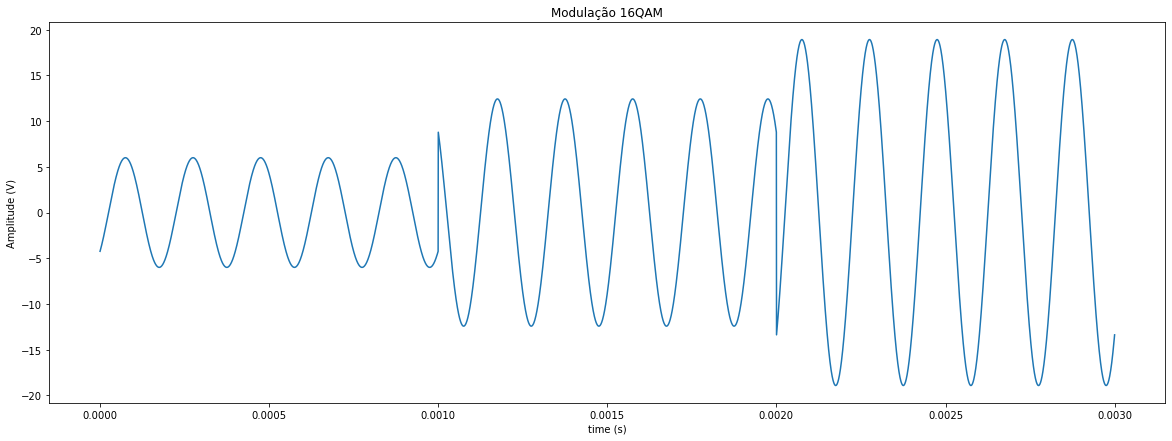

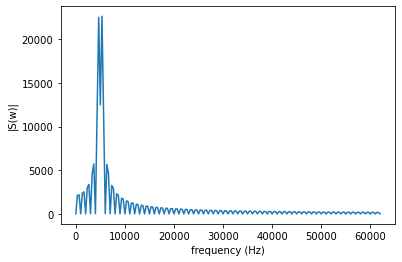

In [86]:
# IQ to signal
ts = np.linspace(0, T_s, num_amostras_por_bit*p)
s_modulated = []
for i in range(len(s_IQ)):
    IQ = s_IQ[i]
    ab = s_ab[i]
    print(IQ)
    print(ab)
    s_modulated.append(freq_amp_shift(IQ, ab, fc, ts))
s_modulated = np.array(s_modulated).flatten()
t = np.linspace(0, T_s*s_groups.shape[0], np.array(s_modulated).size)
viz_modulation(t, s_modulated, T_s, '16QAM')